In [6]:
import numpy as np
from few import FEW
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
import time
from tqdm import tqdm 

def compare_configs(estimators,X,y,classification=False):
    """routine that compares a list of estimators evaluated on a set of data"""
    if classification:
        cv = StratifiedKFold(n_splits=3,shuffle=True)
    else:
        cv = KFold(n_splits=5,shuffle=True)

    trials = 10
    scores = np.ndarray((len(estimators),trials))
    times = np.zeros((len(estimators),trials))
    
    for e,est in tqdm(enumerate(estimators)):
        for t in np.arange(trials):
            t0 = time.time()
            scores[e,t] = np.mean(cross_val_score(est,X,y,cv=cv,n_jobs=-1))
            times[e,t] = time.time() - t0
    
    return scores, times


--- lasso ---


0it [00:00, ?it/s]

problem: concrete


2it [01:24, 41.64s/it]
0it [00:00, ?it/s]

problem: enc


1it [00:42, 42.61s/it]/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=2.263e-05, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
2it [01:17, 40.32s/it]
0it [00:00, ?it/s]

problem: housing


2it [01:14, 35.93s/it]
0it [00:00, ?it/s]

problem: uball5d


2it [03:26, 104.94s/it]
0it [00:00, ?it/s]

problem: yacht


1it [00:50, 50.05s/it]/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 12 iterations, alpha=2.561e-03, previous alpha=1.986e-03, with an active set of 5 regressors.
  ConvergenceWarning)
2it [01:47, 52.21s/it]


--- decision tree ---


0it [00:00, ?it/s]

problem: concrete


2it [01:02, 30.11s/it]
0it [00:00, ?it/s]

problem: enc


2it [00:57, 28.41s/it]
0it [00:00, ?it/s]

problem: housing


2it [00:55, 27.04s/it]
0it [00:00, ?it/s]

problem: uball5d


2it [09:57, 306.96s/it]
0it [00:00, ?it/s]

problem: yacht


2it [00:56, 28.36s/it]


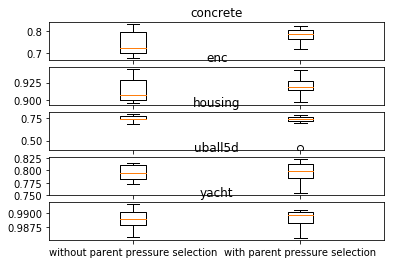

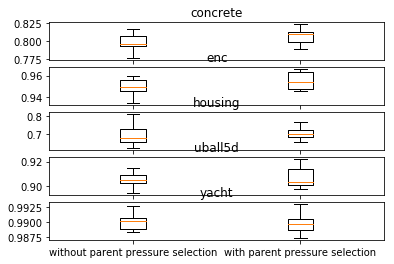

In [2]:
# define FEW configurations to compare

from sklearn.linear_model import LassoLarsCV, LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
%matplotlib inline

# weight_parents=True added for comparison
estimators = {}
estimators['lasso'] = []
estimators['dt'] = []
estimators['lasso'].append(FEW(ml=LassoLarsCV(),generations=100))
estimators['lasso'].append(FEW(ml=LassoLarsCV(),generations=100, weight_parents=True))
estimators['dt'].append(FEW(ml=DecisionTreeRegressor(),generations=100))
estimators['dt'].append(FEW(ml=DecisionTreeRegressor(),generations=100, weight_parents=True))
problems = ['concrete','enc','housing','uball5d','yacht']
# problems = ['enc','housing']
###################################################################################################### lasso
print('--- lasso ---')
h,ax = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('label',axis=1).values)
    y = input_data['label'].values
    scores,times = compare_configs(estimators['lasso'],X,y)
    # plot results
    ax[i].boxplot(list(scores))
    ax[i].set_xticklabels(['without parent pressure selection', 'with parent pressure selection'])
    ax[i].set_title(p)
################################################################################################## decision tree
print('--- decision tree ---')
h2,ax2 = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('label',axis=1).values)
    y = input_data['label'].values
    scores,times = compare_configs(estimators['dt'],X,y)
    # plot results
    ax2[i].boxplot(list(scores))
    ax2[i].set_xticklabels(['without parent pressure selection', 'with parent pressure selection'])
    ax2[i].set_title(p)

plt.show()

--- lasso ---



0it [00:00, ?it/s]

problem: heart







2it [10:15, 309.67s/it]
0it [00:00, ?it/s]

problem: bc_clean


2it [13:01, 377.77s/it]
0it [00:00, ?it/s]

problem: yeast


2it [14:56, 449.24s/it]
0it [00:00, ?it/s]

problem: seg


2it [15:47, 487.33s/it]


problem: wav


2it [39:39, 1070.36s/it]


--- decision tree ---


0it [00:00, ?it/s]

problem: heart


2it [02:54, 86.16s/it]
0it [00:00, ?it/s]

problem: bc_clean


2it [03:50, 115.70s/it]
0it [00:00, ?it/s]

problem: yeast


2it [09:40, 297.93s/it]
0it [00:00, ?it/s]

problem: seg


2it [17:51, 608.63s/it]


problem: wav


2it [44:59, 1389.43s/it]


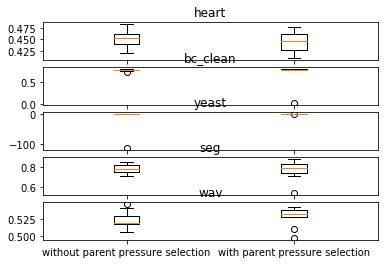

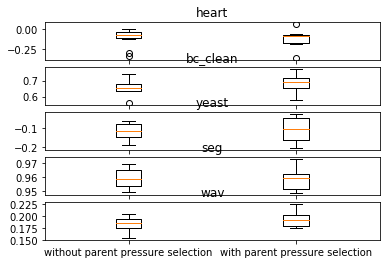

In [4]:
# define FEW configurations to compare for classification

# FEW for these comparisons uses scaling and sklearn's cross_val also, in contrast to previous cell.

from sklearn.linear_model import LassoLarsCV, LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# weight_parents=True added for comparison
estimators = {}
estimators['lasso'] = []
estimators['dt'] = []
estimators['lasso'].append(FEW(ml=LassoLarsCV(),generations=100))
estimators['lasso'].append(FEW(ml=LassoLarsCV(),generations=100, weight_parents=True))
estimators['dt'].append(FEW(ml=DecisionTreeRegressor(),generations=100))
estimators['dt'].append(FEW(ml=DecisionTreeRegressor(),generations=100, weight_parents=True))
problems = ['heart','bc_clean','yeast','seg','wav']
###################################################################################################### lasso
print('--- lasso ---')
h,ax = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('class',axis=1).values)
    y = input_data['class'].values
    scores,times = compare_configs(estimators['lasso'],X,y)
    # plot results
    ax[i].boxplot(list(scores))
    ax[i].set_xticklabels(['without parent pressure selection', 'with parent pressure selection'])
    ax[i].set_title(p)
################################################################################################## decision tree
print('--- decision tree ---')
h2,ax2 = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('class',axis=1).values)
    y = input_data['class'].values
    scores,times = compare_configs(estimators['dt'],X,y)
    # plot results
    ax2[i].boxplot(list(scores))
    ax2[i].set_xticklabels(['without parent pressure selection', 'with parent pressure selection'])
    ax2[i].set_title(p)

plt.show()

--- lasso ---



0it [00:00, ?it/s]

problem: concrete







1it [05:41, 341.08s/it]
0it [00:00, ?it/s]

problem: enc


1it [05:18, 318.46s/it]
0it [00:00, ?it/s]

problem: housing


1it [04:38, 278.45s/it]
0it [00:00, ?it/s]

problem: uball5d


1it [13:00, 780.90s/it]
0it [00:00, ?it/s]

problem: yacht


1it [04:26, 266.72s/it]


--- decision tree ---


0it [00:00, ?it/s]

problem: concrete


1it [03:55, 235.82s/it]
0it [00:00, ?it/s]

problem: enc


1it [02:07, 127.62s/it]
0it [00:00, ?it/s]

problem: housing


1it [02:40, 160.32s/it]
0it [00:00, ?it/s]

problem: uball5d


1it [52:00, 3120.20s/it]
0it [00:00, ?it/s]

problem: yacht


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x100e9da50, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/rishabhgupta/anaconda3/lib/python3.6/site...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/risha.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x100e9da50, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/rishabhgupta/anaconda3/lib/python3.6/site...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/risha.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()
     17 
     18 
     19 
     20 

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 17, 2, 35, 42, 435516, tzinfo=datetime.timezone.utc), 'msg_id': 'CD43BC22744B47B38DF4FE2D14EFD21B', 'msg_type': 'execute_request', 'session': 'BC494A4D58C94F8B8B62B11150102CFB', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'CD43BC22744B47B38DF4FE2D14EFD21B', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'BC494A4D58C94F8B8B62B11150102CFB']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 17, 2, 35, 42, 435516, tzinfo=datetime.timezone.utc), 'msg_id': 'CD43BC22744B47B38DF4FE2D14EFD21B', 'msg_type': 'execute_request', 'session': 'BC494A4D58C94F8B8B62B11150102CFB', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'CD43BC22744B47B38DF4FE2D14EFD21B', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'BC494A4D58C94F8B8B62B11150102CFB'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 17, 2, 35, 42, 435516, tzinfo=datetime.timezone.utc), 'msg_id': 'CD43BC22744B47B38DF4FE2D14EFD21B', 'msg_type': 'execute_request', 'session': 'BC494A4D58C94F8B8B62B11150102CFB', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'CD43BC22744B47B38DF4FE2D14EFD21B', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Import object>, <_ast.Import object>, <_ast.ImportFrom object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.For object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.For object>, <_ast.Expr object>], cell_name='<ipython-input-7-54b5dce3ab1b>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 11253f128, execution_..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x10db16420, file "<ipython-input-7-54b5dce3ab1b>", line 37>
        result = <ExecutionResult object at 11253f128, execution_..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x10db16420, file "<ipython-input-7-54b5dce3ab1b>", line 37>, result=<ExecutionResult object at 11253f128, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x10db16420, file "<ipython-input-7-54b5dce3ab1b>", line 37>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'FEW': <class 'few.few.FEW'>, 'In': ['', 'import numpy as np\nfrom few import FEW\nfrom skle... = time.time() - t0\n    \n    return scores, times', "# define FEW configurations to compare for class... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", 'import numpy as np\nfrom few import FEW\nfrom skle... = time.time() - t0\n    \n    return scores, times', "# define FEW configurations to compare for class... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", "# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", 'import numpy as np\nfrom few import FEW\nfrom skle... = time.time() - t0\n    \n    return scores, times', "# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()"], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LassoLarsCV': <class 'sklearn.linear_model.least_angle.LassoLarsCV'>, 'LogisticRegressionCV': <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>, 'Out': {}, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'FEW': <class 'few.few.FEW'>, 'In': ['', 'import numpy as np\nfrom few import FEW\nfrom skle... = time.time() - t0\n    \n    return scores, times', "# define FEW configurations to compare for class... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", 'import numpy as np\nfrom few import FEW\nfrom skle... = time.time() - t0\n    \n    return scores, times', "# define FEW configurations to compare for class... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", "# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()", 'import numpy as np\nfrom few import FEW\nfrom skle... = time.time() - t0\n    \n    return scores, times', "# define FEW configurations to compare\n\nfrom skl... selection'])\n    ax2[i].set_title(p)\n\nplt.show()"], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LassoLarsCV': <class 'sklearn.linear_model.least_angle.LassoLarsCV'>, 'LogisticRegressionCV': <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>, 'Out': {}, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/rishabhgupta/Downloads/Penn_Medicine/few-config-compare/few-config-compare/<ipython-input-7-54b5dce3ab1b> in <module>()
     37 for i,p in enumerate(problems):
     38     print('problem:',p)
     39     input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
     40     X = StandardScaler().fit_transform(input_data.drop('label',axis=1).values)
     41     y = input_data['label'].values
---> 42     scores,times = compare_configs(estimators['dt'],X,y)
     43     # plot results
     44     ax2[i].boxplot(list(scores))
     45     ax2[i].set_xticklabels(['without parent pressure selection', 'with parent pressure selection'])
     46     ax2[i].set_title(p)

...........................................................................
/Users/rishabhgupta/Downloads/Penn_Medicine/few-config-compare/few-config-compare/<ipython-input-6-ab83226e5d76> in compare_configs(estimators=[FEW(boolean=False, c=True, classification=False,...ersity=False, verbosity=0,
  weight_parents=True)], X=array([[ 0.05415696,  0.16616243, -0.03418367,  ...  0.53568528, -1.92579533,
         1.61245155]]), y=array([  1.10000000e-01,   2.70000000e-01,   4.7...e+01,
         3.04800000e+01,   4.66600000e+01]), classification=False)
     16     times = np.zeros((len(estimators),trials))
     17     
     18     for e,est in tqdm(enumerate(estimators)):
     19         for t in np.arange(trials):
     20             t0 = time.time()
---> 21             scores[e,t] = np.mean(cross_val_score(est,X,y,cv=cv,n_jobs=-1))
     22             times[e,t] = time.time() - t0
     23     
     24     return scores, times
     25 

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_val_score(estimator=FEW(boolean=False, c=True, classification=False,...ersity=False, verbosity=0,
  weight_parents=True), X=array([[ 0.05415696,  0.16616243, -0.03418367,  ...  0.53568528, -1.92579533,
         1.61245155]]), y=array([  1.10000000e-01,   2.70000000e-01,   4.7...e+01,
         3.04800000e+01,   4.66600000e+01]), groups=None, scoring=None, cv=KFold(n_splits=5, random_state=None, shuffle=True), n_jobs=-1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    135     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    136                         pre_dispatch=pre_dispatch)
    137     scores = parallel(delayed(_fit_and_score)(clone(estimator), X, y, scorer,
    138                                               train, test, verbose, None,
    139                                               fit_params)
--> 140                       for train, test in cv_iter)
        cv_iter = [(array([  0,   1,   2,   3,   4,   5,   6,   7,  ...96, 297, 298, 300, 301, 302, 303, 304, 305, 306]), array([ 10,  14,  16,  18,  28,  38,  55,  56,  ...46, 249, 261, 276, 277, 279, 282, 284, 299, 307])), (array([  0,   1,   2,   3,   4,   6,   8,   9,  ...97, 298, 299, 300, 301, 302, 304, 305, 306, 307]), array([  5,   7,  19,  23,  27,  29,  30,  32,  ...64, 270, 272, 273, 283, 286, 287, 290, 291, 303])), (array([  0,   2,   3,   4,   5,   6,   7,   9,  ...95, 296, 299, 300, 301, 302, 303, 305, 306, 307]), array([  1,   8,  11,  13,  20,  26,  34,  35,  ...68, 275, 285, 288, 292, 293, 294, 297, 298, 304])), (array([  1,   3,   5,   7,   8,   9,  10,  11,  ...97, 298, 299, 300, 302, 303, 304, 305, 306, 307]), array([  0,   2,   4,   6,  12,  31,  33,  43,  ...    267, 269, 271, 274, 280, 281, 295, 296, 301])), (array([  0,   1,   2,   4,   5,   6,   7,   8,  ...94, 295, 296, 297, 298, 299, 301, 303, 304, 307]), array([  3,   9,  15,  17,  21,  22,  24,  25,  ...    250, 260, 263, 278, 289, 300, 302, 305, 306]))]
    141     return np.array(scores)[:, 0]
    142 
    143 
    144 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object cross_val_score.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Jul 17 00:10:13 2017
PID: 10929           Python 3.6.1: /Users/rishabhgupta/anaconda3/bin/python
...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (FEW(boolean=False, c=True, classification=False,...ersity=False, verbosity=0,
  weight_parents=True), array([[ 0.05415696,  0.16616243, -0.03418367,  ...  0.53568528, -1.92579533,
         1.61245155]]), array([  1.10000000e-01,   2.70000000e-01,   4.7...e+01,
         3.04800000e+01,   4.66600000e+01]), <function _passthrough_scorer>, array([  0,   1,   2,   3,   4,   6,   8,   9,  ...97, 298, 299, 300, 301, 302, 304, 305, 306, 307]), array([  5,   7,  19,  23,  27,  29,  30,  32,  ...64, 270, 272, 273, 283, 286, 287, 290, 291, 303]), 0, None, None), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (FEW(boolean=False, c=True, classification=False,...ersity=False, verbosity=0,
  weight_parents=True), array([[ 0.05415696,  0.16616243, -0.03418367,  ...  0.53568528, -1.92579533,
         1.61245155]]), array([  1.10000000e-01,   2.70000000e-01,   4.7...e+01,
         3.04800000e+01,   4.66600000e+01]), <function _passthrough_scorer>, array([  0,   1,   2,   3,   4,   6,   8,   9,  ...97, 298, 299, 300, 301, 302, 304, 305, 306, 307]), array([  5,   7,  19,  23,  27,  29,  30,  32,  ...64, 270, 272, 273, 283, 286, 287, 290, 291, 303]), 0, None, None)
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=FEW(boolean=False, c=True, classification=False,...ersity=False, verbosity=0,
  weight_parents=True), X=array([[ 0.05415696,  0.16616243, -0.03418367,  ...  0.53568528, -1.92579533,
         1.61245155]]), y=array([  1.10000000e-01,   2.70000000e-01,   4.7...e+01,
         3.04800000e+01,   4.66600000e+01]), scorer=<function _passthrough_scorer>, train=array([  0,   1,   2,   3,   4,   6,   8,   9,  ...97, 298, 299, 300, 301, 302, 304, 305, 306, 307]), test=array([  5,   7,  19,  23,  27,  29,  30,  32,  ...64, 270, 272, 273, 283, 286, 287, 290, 291, 303]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    233 
    234     try:
    235         if y_train is None:
    236             estimator.fit(X_train, **fit_params)
    237         else:
--> 238             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method FEW.fit of FEW(boolean=False, c=Tr...rsity=False, verbosity=0,
  weight_parents=True)>
        X_train = array([[ 0.05415696,  0.16616243, -0.03418367,  ...  0.53568528, -1.92579533,
         1.61245155]])
        y_train = array([  1.10000000e-01,   2.70000000e-01,   4.7...5900000e+01,   3.04800000e+01,   4.66600000e+01])
        fit_params = {}
    239 
    240     except Exception as e:
    241         # Note fit time as time until error
    242         fit_time = time.time() - start_time

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/FEW-0.0.42-py3.6-macosx-10.7-x86_64.egg/few/few.py in fit(self=FEW(boolean=False, c=True, classification=False,...ersity=False, verbosity=0,
  weight_parents=True), features=array([[ 0.05415696,  0.16616243, -0.03418367,  ...  0.53568528, -1.92579533,
         1.61245155]]), labels=array([  1.10000000e-01,   2.70000000e-01,   4.7...5900000e+01,   3.04800000e+01,   4.66600000e+01]))
    319                 stall_count = stall_count + 1
    320 
    321             ########################################################## variation
    322             if self.verbosity > 2:
    323                 print("variation...")
--> 324             offspring,elite,elite_index = self.variation(self.pop.individuals)
        offspring = [<few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, ...]
        elite = <few.population.Ind object>
        elite_index = 0
        self.variation = <bound method VariationMixin.variation of FEW(bo...rsity=False, verbosity=0,
  weight_parents=True)>
        self.pop.individuals = [<few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, ...]
    325 
    326             ################################################# evaluate offspring
    327             if self.verbosity > 2:
    328                 print("output...")

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/FEW-0.0.42-py3.6-macosx-10.7-x86_64.egg/few/variation.py in variation(self=FEW(boolean=False, c=True, classification=False,...ersity=False, verbosity=0,
  weight_parents=True), parents=[<few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, <few.population.Ind object>, ...])
     42                 if self.weight_parents:
     43                     weights = self.ml.named_steps['ml'].feature_importances_
     44                     weights = weights/sum(weights)
     45                     offspring = copy.deepcopy(list(
     46                         np.random.choice(self.valid(parents),
---> 47                                          self.population_size, p=weights)))
        self.population_size = 50
        weights = array([  1.24824299e-03,   2.85420591e-04,   1.4...e-06,
         5.52198090e-07,   7.79952365e-06])
     48                 else:
     49                     offspring = copy.deepcopy(list(
     50                         x for i,x in zip(self.ml.named_steps['ml'].feature_importances_,
     51                                          self.valid(parents)) if  i != 0))

...........................................................................
/Users/rishabhgupta/anaconda3/lib/python3.6/site-packages/numpy/random/mtrand.cpython-36m-darwin.so in mtrand.RandomState.choice (numpy/random/mtrand/mtrand.c:17729)()
   1123 
   1124 
   1125 
   1126 
   1127 
-> 1128 
   1129 
   1130 
   1131 
   1132 

ValueError: probabilities are not non-negative
___________________________________________________________________________

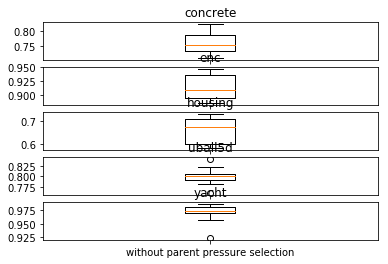

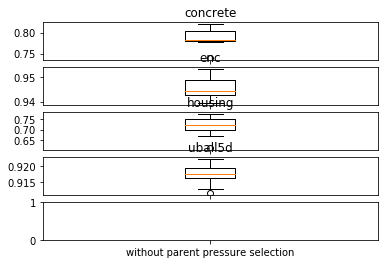

In [7]:
# define FEW configurations to compare

# FEW for these comparisons uses scaling and sklearn's cross_val also, as compared to first comparison.

from sklearn.linear_model import LassoLarsCV, LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
%matplotlib inline

# weight_parents=True added for comparison
estimators = {}
estimators['lasso'] = []
estimators['dt'] = []
estimators['lasso'].append(FEW(ml=LassoLarsCV(),generations=100))
#estimators['lasso'].append(FEW(ml=LassoLarsCV(),generations=100, weight_parents=True))
estimators['dt'].append(FEW(ml=DecisionTreeRegressor(),generations=100))
#estimators['dt'].append(FEW(ml=DecisionTreeRegressor(),generations=100, weight_parents=True))
problems = ['concrete','enc','housing','uball5d','yacht']
# problems = ['enc','housing']
###################################################################################################### lasso
print('--- lasso ---')
h,ax = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('label',axis=1).values)
    y = input_data['label'].values
    scores,times = compare_configs(estimators['lasso'],X,y)
    # plot results
    ax[i].boxplot(list(scores))
    ax[i].set_xticklabels(['without parent pressure selection'])
    ax[i].set_title(p)
################################################################################################## decision tree
print('--- decision tree ---')
h2,ax2 = plt.subplots(len(problems),sharex=True)
for i,p in enumerate(problems):
    print('problem:',p)
    input_data = pd.read_csv('data/d_' + p + '.txt', sep=None, engine='python')
    X = StandardScaler().fit_transform(input_data.drop('label',axis=1).values)
    y = input_data['label'].values
    scores,times = compare_configs(estimators['dt'],X,y)
    # plot results
    ax2[i].boxplot(list(scores))
    ax2[i].set_xticklabels(['without parent pressure selection'])
    ax2[i].set_title(p)

plt.show()